In [25]:
import os
import csv
import numpy as np
import cv2
from glob import glob
import json
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
print(os.listdir('../data'))
path_base = '../data'
path_to_annot = os.path.join(path_base, 'anno')

print(path_to_annot)

['anno', 'val2017', 'train2017', 'csv']
../data/anno


In [3]:
train_annot = glob(os.path.join(path_to_annot, 'train*/*.json'), recursive=True)
val_annot = glob(os.path.join(path_to_annot, 'val*/*.json'), recursive=True)

In [4]:
print('train annot size: ', len(train_annot))
print('val annot size: ', len(val_annot))

train annot size:  10000
val annot size:  4167


In [5]:
training_img = glob(os.path.join(path_base, 'train*/*'))
print('train imgs size: ', len(training_img))
val_img = glob(os.path.join(path_base, 'val*/*'))
print('val imgs size: ', len(val_img))

train imgs size:  10000
val imgs size:  4167


In [6]:
def read_json(path_to_file):
    with open(path_to_file) as file:
        json_data = json.load(file)
    return json_data

In [7]:
classes = set()
i = 0
for f in train_annot + val_annot:
    j_data = read_json(f) 
    i += 1
    for label in j_data['labels']:
        classes.add(label)
print('total number of labels',  len(classes))

total number of labels 68


In [8]:
labels_to_find = ['nudity', 'face', 'credit_card', 'passport', 'ticket', 'disability_physical', 
                  'fingerprint', 'safe']
for label in classes:
    for l in labels_to_find:
        if l in label:
            print(label)

a31_passport
a7_fingerprint
a30_credit_card
a39_disability_physical
a9_face_complete
a38_ticket
a0_safe
a10_face_partial
a13_full_nudity
a12_semi_nudity


In [9]:
def get_output_dict(list_to_process, labels_to_predict):
    output_data = {}
    for f in list_to_process:
        j_data = read_json(f)
        values = np.zeros(len(labels_to_predict))
        for label in j_data['labels']:
            for idx, l in enumerate(labels_to_predict):
                if l in label:
                    values[idx] = 1
        img_path = j_data['image_path'].split('/')[-1]
        output_data[img_path] = values
    return output_data
                    

In [10]:
step = 4000
start = 0l_
data = val_annot
data_name = 'val'
for end in range(step, len(data), step):
    if end + step >= len(data):
        end += len(data) - end
    result = get_output_dict(data[start:end], labels_to_find)
    with open('{}_{}_{}.csv'.format(data_name,start, end), 'w') as f:
        writer = csv.writer(f)
        for key in result.keys():
            writer.writerow((key, *result[key]))
    start = end

In [11]:
def get_annot_list(path_to_annot):
    final_list = {}
    with open(path_to_annot) as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            labels = [float(label) for label in row[1:]]
            final_list[row[0]] = labels
    return final_list

In [30]:
path_to_annot = "../data/csv/train_0_10000.csv"
path_to_imgs = '../data/train2017'
list_annot = get_annot_list(path_to_annot)
total_result = np.zeros(8)
tota_sizes = set()
corrupted_imgs = list()
for idx, key in tqdm(enumerate(list_annot)):
    img_pth = os.path.join(path_to_imgs, key)
    img = cv2.imread(img_pth)
    if  img is not None:
        tota_sizes.add(img.shape)
    else:
        corrupted_imgs.append((idx, key))
    total_result += list_annot[key]





0it [00:00, ?it/s]



1it [00:00,  5.25it/s]



2it [00:00,  5.90it/s]



4it [00:00,  7.32it/s]



5it [00:00,  7.90it/s]



9it [00:00,  9.97it/s]



11it [00:00, 11.56it/s]



13it [00:01,  7.75it/s]



15it [00:01,  8.22it/s]



17it [00:01,  9.55it/s]



19it [00:01,  9.37it/s]



23it [00:02, 10.98it/s]



25it [00:02, 11.31it/s]



27it [00:02, 12.60it/s]



29it [00:02, 10.81it/s]



31it [00:02, 11.18it/s]



33it [00:03,  8.91it/s]



35it [00:03, 10.01it/s]



39it [00:03, 11.81it/s]



41it [00:03, 13.40it/s]



43it [00:03, 11.84it/s]



45it [00:03, 12.22it/s]



50it [00:04, 14.54it/s]



53it [00:04, 15.67it/s]



55it [00:04, 11.40it/s]



60it [00:04, 13.96it/s]



62it [00:04, 10.65it/s]



65it [00:05, 11.87it/s]



67it [00:05, 13.49it/s]



71it [00:05, 13.84it/s]



74it [00:05, 14.14it/s]



76it [00:06,  8.80it/s]



78it [00:06,  9.55it/s]



80it [00:06, 11.05it/s]



82it [00:06, 10.25it/s]



84it [00:06,  9.86it/s]



88it [00:06, 12.67it/s]



90it [0

513it [00:44,  7.73it/s]



517it [00:44,  9.97it/s]



520it [00:45, 11.87it/s]



522it [00:45, 10.58it/s]



525it [00:45, 11.46it/s]



527it [00:45, 12.96it/s]



532it [00:45, 16.57it/s]



536it [00:45, 18.98it/s]



539it [00:46, 17.58it/s]



544it [00:46, 20.49it/s]



547it [00:46, 21.94it/s]



552it [00:46, 26.21it/s]



556it [00:46, 17.67it/s]



559it [00:47, 15.36it/s]



562it [00:47, 13.23it/s]



564it [00:47, 10.21it/s]



566it [00:47, 10.46it/s]



568it [00:48,  8.75it/s]



570it [00:48,  8.66it/s]



572it [00:48,  6.76it/s]



573it [00:48,  6.48it/s]



576it [00:49,  8.27it/s]



579it [00:49,  9.64it/s]



582it [00:49, 11.91it/s]



584it [00:49,  9.94it/s]



586it [00:49, 10.01it/s]



588it [00:50,  6.19it/s]



592it [00:50,  7.88it/s]



598it [00:50, 10.32it/s]



601it [00:51,  9.52it/s]



603it [00:51, 10.11it/s]



606it [00:51, 11.57it/s]



608it [00:51, 11.35it/s]



610it [00:52,  6.11it/s]



612it [00:52,  7.32it/s]



615it [00:52,  9.44i

1025it [01:29,  9.29it/s]



1027it [01:29, 10.14it/s]



1031it [01:29, 12.85it/s]



1033it [01:30, 11.34it/s]



1035it [01:30, 10.17it/s]



1037it [01:30, 10.49it/s]



1039it [01:30,  7.66it/s]



1043it [01:31,  7.44it/s]



1044it [01:31,  5.87it/s]



1046it [01:32,  6.26it/s]



1048it [01:32,  7.20it/s]



1052it [01:32,  8.48it/s]



1055it [01:32, 10.78it/s]



1058it [01:32, 12.10it/s]



1062it [01:32, 14.83it/s]



1065it [01:33, 11.81it/s]



1067it [01:33, 13.16it/s]



1069it [01:33,  9.36it/s]



1074it [01:33, 12.37it/s]



1077it [01:34, 12.66it/s]



1080it [01:34, 12.74it/s]



1082it [01:34,  7.92it/s]



1084it [01:34,  9.48it/s]



1086it [01:34, 11.01it/s]



1088it [01:35,  8.82it/s]



1090it [01:35,  6.93it/s]



1092it [01:35,  7.89it/s]



1094it [01:36,  9.19it/s]



1096it [01:36, 10.49it/s]



1098it [01:36, 10.09it/s]



1101it [01:36, 11.74it/s]



1105it [01:36, 14.20it/s]



1107it [01:36, 14.10it/s]



1110it [01:36, 15.54it/s]



1112it [01:37,

1529it [02:14, 11.54it/s]



1531it [02:14, 10.15it/s]



1533it [02:14, 10.40it/s]



1535it [02:14, 11.61it/s]



1537it [02:14, 13.08it/s]



1539it [02:15, 12.62it/s]



1541it [02:15, 12.70it/s]



1543it [02:15, 12.62it/s]



1547it [02:15, 14.45it/s]



1549it [02:15, 11.13it/s]



1553it [02:16, 12.41it/s]



1555it [02:16, 13.95it/s]



1559it [02:16, 17.02it/s]



1562it [02:16, 13.46it/s]



1564it [02:16, 11.79it/s]



1567it [02:17, 14.14it/s]



1569it [02:17, 13.32it/s]



1571it [02:17, 14.34it/s]



1573it [02:17, 11.94it/s]



1576it [02:17, 14.23it/s]



1578it [02:17, 11.63it/s]



1580it [02:18,  9.87it/s]



1582it [02:18,  8.20it/s]



1584it [02:18,  9.42it/s]



1586it [02:18, 10.74it/s]



1589it [02:18, 13.03it/s]



1591it [02:19, 11.14it/s]



1593it [02:19, 12.80it/s]



1596it [02:19, 11.19it/s]



1598it [02:19, 12.21it/s]



1600it [02:19, 11.78it/s]



1602it [02:20, 13.27it/s]



1604it [02:20, 10.44it/s]



1606it [02:20,  8.21it/s]



1608it [02:20,

2032it [02:56, 18.76it/s]



2037it [02:56, 21.16it/s]



2040it [02:56, 22.78it/s]



2044it [02:56, 22.64it/s]



2047it [02:56, 14.38it/s]



2049it [02:57, 10.06it/s]



2053it [02:57, 10.60it/s]



2056it [02:58,  8.04it/s]



2058it [02:58,  9.11it/s]



2062it [02:58, 11.73it/s]



2064it [02:58, 10.40it/s]



2066it [02:58, 12.12it/s]



2068it [02:58, 12.96it/s]



2071it [02:59, 11.78it/s]



2075it [02:59, 14.00it/s]



2077it [02:59, 10.64it/s]



2079it [03:00,  8.85it/s]



2082it [03:00,  9.78it/s]



2084it [03:00, 10.98it/s]



2087it [03:00, 12.90it/s]



2092it [03:00, 14.79it/s]



2094it [03:00, 11.59it/s]



2096it [03:01, 12.20it/s]



2098it [03:01,  6.71it/s]



2100it [03:02,  6.47it/s]



2102it [03:02,  7.53it/s]



2104it [03:02,  7.00it/s]



2107it [03:02,  8.62it/s]



2109it [03:02,  9.68it/s]



2113it [03:02, 12.34it/s]



2115it [03:03, 13.59it/s]



2118it [03:03, 12.48it/s]



2123it [03:03, 15.72it/s]



2126it [03:03, 12.12it/s]



2130it [03:04,

2537it [03:42, 10.77it/s]



2539it [03:42, 12.12it/s]



2546it [03:42, 13.97it/s]



2548it [03:42, 13.60it/s]



2550it [03:43,  9.12it/s]



2552it [03:43, 10.04it/s]



2554it [03:43,  8.42it/s]



2556it [03:44,  9.37it/s]



2558it [03:44,  8.50it/s]



2560it [03:44,  7.98it/s]



2563it [03:44,  9.56it/s]



2565it [03:44,  9.63it/s]



2567it [03:45,  8.63it/s]



2571it [03:45, 10.95it/s]



2573it [03:45,  8.78it/s]



2575it [03:45,  8.49it/s]



2577it [03:46,  8.18it/s]



2579it [03:46,  8.65it/s]



2581it [03:46,  7.62it/s]



2583it [03:47,  7.79it/s]



2584it [03:47,  5.75it/s]



2588it [03:47,  7.72it/s]



2590it [03:47,  8.94it/s]



2592it [03:47,  9.13it/s]



2594it [03:48,  8.06it/s]



2596it [03:48,  8.87it/s]



2598it [03:48,  9.97it/s]



2600it [03:48, 11.34it/s]



2603it [03:48, 13.45it/s]



2605it [03:48, 13.88it/s]



2610it [03:49, 15.19it/s]



2613it [03:49, 17.04it/s]



2615it [03:49, 17.28it/s]



2617it [03:49, 13.73it/s]



2619it [03:50,

3049it [04:28, 11.29it/s]



3051it [04:28,  7.59it/s]



3053it [04:28,  8.62it/s]



3055it [04:28,  9.63it/s]



3057it [04:29,  9.81it/s]



3059it [04:29,  7.52it/s]



3061it [04:29,  7.93it/s]



3062it [04:29,  7.13it/s]



3064it [04:30,  7.50it/s]



3067it [04:30,  8.43it/s]



3069it [04:30, 10.16it/s]



3071it [04:30, 10.57it/s]



3075it [04:30, 11.63it/s]



3077it [04:31, 11.50it/s]



3079it [04:31, 11.09it/s]



3082it [04:31, 12.34it/s]



3088it [04:31, 15.52it/s]



3091it [04:31, 12.13it/s]



3093it [04:32, 12.28it/s]



3095it [04:32, 11.90it/s]



3097it [04:32, 10.15it/s]



3099it [04:32, 10.43it/s]



3104it [04:32, 13.15it/s]



3106it [04:33,  9.77it/s]



3108it [04:33,  9.42it/s]



3110it [04:33,  9.19it/s]



3113it [04:33, 10.94it/s]



3115it [04:34,  9.08it/s]



3118it [04:34, 10.26it/s]



3121it [04:34, 12.31it/s]



3123it [04:34,  9.12it/s]



3125it [04:35,  9.37it/s]



3128it [04:35, 11.64it/s]



3130it [04:35, 12.29it/s]



3132it [04:35,

3546it [05:12, 11.54it/s]



3549it [05:12, 12.29it/s]



3551it [05:13, 10.45it/s]



3553it [05:13, 10.77it/s]



3555it [05:13, 12.25it/s]



3557it [05:13, 11.02it/s]



3559it [05:13,  9.97it/s]



3562it [05:14, 10.87it/s]



3564it [05:14, 11.70it/s]



3566it [05:14, 11.30it/s]



3568it [05:14, 11.28it/s]



3570it [05:14, 12.07it/s]



3575it [05:14, 15.61it/s]



3578it [05:15, 15.11it/s]



3581it [05:15, 16.02it/s]



3588it [05:15, 19.27it/s]



3593it [05:15, 22.14it/s]



3599it [05:15, 25.18it/s]



3603it [05:16, 17.38it/s]



3606it [05:16, 19.07it/s]



3609it [05:16, 15.68it/s]



3612it [05:16, 16.40it/s]



3614it [05:16, 15.55it/s]



3616it [05:17, 13.96it/s]



3618it [05:17, 13.50it/s]



3621it [05:17, 14.59it/s]



3623it [05:17, 13.05it/s]



3627it [05:17, 15.40it/s]



3629it [05:17, 13.62it/s]



3631it [05:18, 10.57it/s]



3633it [05:18,  9.17it/s]



3635it [05:18, 10.13it/s]



3637it [05:18, 11.52it/s]



3639it [05:19,  8.04it/s]



3641it [05:19,

4055it [05:55, 11.29it/s]



4058it [05:55, 11.15it/s]



4061it [05:56, 11.06it/s]



4064it [05:56, 10.56it/s]



4069it [05:56, 13.22it/s]



4071it [05:57,  7.00it/s]



4076it [05:57,  9.34it/s]



4079it [05:57, 11.02it/s]



4082it [05:58,  8.47it/s]



4084it [05:58,  7.78it/s]



4086it [05:58,  8.57it/s]



4088it [05:58,  9.87it/s]



4090it [05:58, 10.32it/s]



4094it [05:59, 13.04it/s]



4097it [05:59, 12.97it/s]



4099it [05:59, 13.45it/s]



4101it [05:59,  7.75it/s]



4103it [06:00,  7.65it/s]



4105it [06:00,  9.39it/s]



4107it [06:00,  9.97it/s]



4113it [06:00, 11.93it/s]



4116it [06:00, 12.23it/s]



4118it [06:01, 12.81it/s]



4121it [06:01, 15.29it/s]



4123it [06:01, 10.72it/s]



4126it [06:01, 13.26it/s]



4128it [06:02,  9.03it/s]



4130it [06:02, 10.07it/s]



4133it [06:02,  9.99it/s]



4135it [06:02, 10.59it/s]



4137it [06:02, 10.42it/s]



4139it [06:03,  9.25it/s]



4142it [06:03, 10.02it/s]



4147it [06:03, 12.96it/s]



4152it [06:03,

4601it [06:40, 10.85it/s]



4603it [06:40, 12.22it/s]



4605it [06:40, 13.51it/s]



4610it [06:40, 15.80it/s]



4613it [06:40, 10.94it/s]



4615it [06:41, 10.21it/s]



4617it [06:41, 10.30it/s]



4619it [06:41, 10.69it/s]



4621it [06:41, 11.93it/s]



4624it [06:41, 14.31it/s]



4626it [06:42, 11.05it/s]



4628it [06:42,  9.35it/s]



4630it [06:42,  6.74it/s]



4632it [06:42,  8.32it/s]



4634it [06:43,  9.52it/s]



4636it [06:43, 10.58it/s]



4638it [06:43,  7.68it/s]



4640it [06:43,  8.28it/s]



4642it [06:43,  9.83it/s]



4644it [06:44, 11.23it/s]



4648it [06:44, 13.47it/s]



4650it [06:44,  7.87it/s]



4656it [06:44, 10.51it/s]



4659it [06:45, 12.08it/s]



4662it [06:45, 13.02it/s]



4665it [06:45, 14.52it/s]



4668it [06:45, 11.59it/s]



4670it [06:45, 11.87it/s]



4672it [06:46, 12.42it/s]



4674it [06:46,  9.62it/s]



4676it [06:46,  8.48it/s]



4681it [06:46, 11.10it/s]



4687it [06:46, 14.57it/s]



4690it [06:47, 11.23it/s]



4693it [06:47,

5126it [07:23,  9.00it/s]



5132it [07:24, 11.92it/s]



5135it [07:24, 11.91it/s]



5138it [07:24, 13.79it/s]



5140it [07:24, 14.48it/s]



5142it [07:24, 14.90it/s]



5144it [07:24, 12.10it/s]



5146it [07:25, 11.92it/s]



5149it [07:25, 12.01it/s]



5151it [07:25, 12.31it/s]



5154it [07:25, 14.28it/s]



5156it [07:25,  9.94it/s]



5162it [07:26, 12.89it/s]



5165it [07:26, 11.89it/s]



5168it [07:26, 14.47it/s]



5172it [07:26, 17.83it/s]



5175it [07:26, 13.41it/s]



5178it [07:27, 13.90it/s]



5180it [07:27, 14.45it/s]



5182it [07:27, 14.02it/s]



5184it [07:27, 15.28it/s]



5186it [07:27, 16.05it/s]



5188it [07:28,  9.20it/s]



5192it [07:28, 11.28it/s]



5196it [07:28, 11.86it/s]



5198it [07:28, 11.66it/s]



5201it [07:28, 12.78it/s]



5203it [07:29, 13.92it/s]



5205it [07:29, 12.60it/s]



5207it [07:29, 10.08it/s]



5209it [07:29, 10.07it/s]



5212it [07:29, 11.39it/s]



5216it [07:29, 14.39it/s]



5219it [07:30, 14.26it/s]



5222it [07:30,

5619it [08:06, 11.32it/s]



5621it [08:06, 10.75it/s]



5623it [08:06, 10.17it/s]



5625it [08:07,  9.47it/s]



5630it [08:07, 12.20it/s]



5632it [08:07, 13.30it/s]



5634it [08:07, 14.46it/s]



5638it [08:07, 16.41it/s]



5640it [08:07, 13.45it/s]



5642it [08:08, 11.98it/s]



5644it [08:08,  8.79it/s]



5646it [08:09,  5.89it/s]



5647it [08:09,  6.08it/s]



5648it [08:09,  6.49it/s]



5651it [08:09,  7.84it/s]



5653it [08:09,  9.18it/s]



5655it [08:09, 10.66it/s]



5657it [08:09, 11.83it/s]



5659it [08:10, 12.35it/s]



5661it [08:10, 12.03it/s]



5663it [08:10, 11.08it/s]



5668it [08:10, 12.44it/s]



5670it [08:10, 13.65it/s]



5672it [08:11, 12.76it/s]



5674it [08:11, 13.36it/s]



5676it [08:11, 11.77it/s]



5678it [08:11, 10.15it/s]



5681it [08:11, 10.60it/s]



5685it [08:12, 13.47it/s]



5687it [08:12, 11.64it/s]



5690it [08:12, 11.85it/s]



5692it [08:12,  9.51it/s]



5695it [08:12, 11.93it/s]



5699it [08:13, 14.67it/s]



5702it [08:13,

6094it [08:50, 13.86it/s]



6096it [08:50, 14.38it/s]



6098it [08:50, 12.88it/s]



6100it [08:50,  9.85it/s]



6102it [08:51,  9.54it/s]



6104it [08:51, 10.89it/s]



6107it [08:51, 12.67it/s]



6109it [08:51, 13.50it/s]



6114it [08:51, 16.43it/s]



6117it [08:51, 15.91it/s]



6122it [08:51, 19.83it/s]



6125it [08:52, 13.08it/s]



6128it [08:52, 13.66it/s]



6130it [08:53,  7.30it/s]



6133it [08:53,  9.26it/s]



6135it [08:53,  9.11it/s]



6138it [08:53, 11.35it/s]



6140it [08:53, 12.73it/s]



6145it [08:53, 16.17it/s]



6148it [08:54, 10.84it/s]



6151it [08:54, 12.39it/s]



6153it [08:54, 10.16it/s]



6156it [08:54, 11.64it/s]



6158it [08:55, 10.26it/s]



6161it [08:55,  9.87it/s]



6163it [08:55,  8.04it/s]



6165it [08:56,  7.32it/s]



6167it [08:56,  8.58it/s]



6169it [08:56, 10.23it/s]



6171it [08:56, 10.32it/s]



6174it [08:56, 12.81it/s]



6176it [08:56, 11.94it/s]



6178it [08:57, 10.01it/s]



6181it [08:57, 12.49it/s]



6185it [08:57,

6609it [09:35, 17.82it/s]



6612it [09:35, 15.71it/s]



6615it [09:36,  8.99it/s]



6617it [09:36, 10.18it/s]



6619it [09:36, 11.93it/s]



6621it [09:36, 11.17it/s]



6624it [09:37, 12.61it/s]



6626it [09:37, 13.25it/s]



6628it [09:37, 14.11it/s]



6631it [09:37, 15.15it/s]



6635it [09:37, 17.03it/s]



6638it [09:37, 16.75it/s]



6642it [09:37, 18.39it/s]



6645it [09:38, 20.01it/s]



6648it [09:38, 21.76it/s]



6651it [09:38, 22.82it/s]



6654it [09:38, 17.85it/s]



6657it [09:38, 16.27it/s]



6659it [09:38, 15.66it/s]



6662it [09:39, 15.81it/s]



6664it [09:39, 14.21it/s]



6666it [09:39,  9.47it/s]



6671it [09:39, 12.50it/s]



6674it [09:40, 11.24it/s]



6677it [09:40, 12.98it/s]



6679it [09:40,  9.78it/s]



6681it [09:40,  9.93it/s]



6683it [09:40, 10.78it/s]



6686it [09:41, 11.15it/s]



6688it [09:41, 10.02it/s]



6690it [09:41, 10.05it/s]



6692it [09:41,  8.17it/s]



6695it [09:42,  9.47it/s]



6697it [09:42,  8.66it/s]



6700it [09:42,

7125it [10:18,  9.49it/s]



7128it [10:18, 11.69it/s]



7130it [10:18, 10.32it/s]



7132it [10:19,  8.65it/s]



7134it [10:19, 10.04it/s]



7137it [10:19, 11.93it/s]



7140it [10:19, 13.82it/s]



7142it [10:20, 10.26it/s]



7144it [10:20, 10.24it/s]



7146it [10:20,  9.34it/s]



7148it [10:20, 10.04it/s]



7151it [10:20, 11.27it/s]



7153it [10:21, 10.95it/s]



7155it [10:21, 11.61it/s]



7157it [10:21, 11.95it/s]



7159it [10:22,  5.40it/s]



7160it [10:22,  5.77it/s]



7161it [10:22,  4.11it/s]



7163it [10:22,  5.29it/s]



7165it [10:22,  6.74it/s]



7167it [10:23,  7.66it/s]



7170it [10:23,  8.20it/s]



7172it [10:23,  8.25it/s]



7175it [10:23,  9.69it/s]



7177it [10:24, 10.20it/s]



7179it [10:24,  8.40it/s]



7181it [10:24,  9.23it/s]



7183it [10:24,  6.83it/s]



7185it [10:25,  7.52it/s]



7188it [10:25,  9.21it/s]



7191it [10:25, 10.35it/s]



7194it [10:25, 11.36it/s]



7197it [10:25, 12.84it/s]



7200it [10:26, 13.93it/s]



7203it [10:26,

7629it [11:01,  8.12it/s]



7631it [11:02,  7.13it/s]



7634it [11:02,  9.06it/s]



7636it [11:02,  8.75it/s]



7638it [11:02,  7.92it/s]



7640it [11:03,  7.88it/s]



7642it [11:03,  8.70it/s]



7644it [11:03,  9.98it/s]



7646it [11:03,  8.36it/s]



7648it [11:03,  9.24it/s]



7650it [11:04, 10.12it/s]



7652it [11:04,  8.34it/s]



7653it [11:04,  7.00it/s]



7654it [11:04,  6.16it/s]



7657it [11:05,  6.79it/s]



7658it [11:05,  7.49it/s]



7661it [11:05,  9.27it/s]



7664it [11:05, 10.13it/s]



7666it [11:05,  9.44it/s]



7668it [11:06,  8.21it/s]



7669it [11:06,  8.63it/s]



7671it [11:06,  8.37it/s]



7674it [11:06,  9.30it/s]



7676it [11:07,  8.71it/s]



7677it [11:07,  8.63it/s]



7678it [11:07,  7.77it/s]



7681it [11:07,  8.47it/s]



7683it [11:07, 10.12it/s]



7685it [11:07, 10.83it/s]



7691it [11:07, 14.34it/s]



7694it [11:08, 12.41it/s]



7697it [11:08, 12.91it/s]



7699it [11:08,  9.76it/s]



7702it [11:08, 11.53it/s]



7704it [11:09,

8117it [11:46,  6.56it/s]



8118it [11:46,  6.42it/s]



8119it [11:46,  5.92it/s]



8122it [11:46,  7.30it/s]



8126it [11:47,  8.50it/s]



8129it [11:47,  9.49it/s]



8131it [11:47,  9.83it/s]



8133it [11:47,  9.91it/s]



8135it [11:48,  8.97it/s]



8136it [11:48,  8.07it/s]



8137it [11:48,  7.97it/s]



8138it [11:48,  4.82it/s]



8139it [11:49,  5.09it/s]



8141it [11:49,  5.82it/s]



8142it [11:49,  6.50it/s]



8145it [11:49,  8.18it/s]



8148it [11:49,  9.64it/s]



8151it [11:49, 11.99it/s]



8153it [11:49, 11.59it/s]



8155it [11:50, 10.45it/s]



8157it [11:50, 11.39it/s]



8159it [11:50,  9.33it/s]



8162it [11:50, 11.53it/s]



8164it [11:50, 12.84it/s]



8166it [11:51, 13.53it/s]



8168it [11:51, 12.09it/s]



8170it [11:51, 13.19it/s]



8173it [11:52,  7.38it/s]



8175it [11:52,  8.98it/s]



8177it [11:52,  8.33it/s]



8179it [11:52,  9.35it/s]



8182it [11:52, 10.57it/s]



8186it [11:53, 10.54it/s]



8189it [11:53, 12.71it/s]



8194it [11:53,

8587it [12:29,  7.35it/s]



8590it [12:30,  9.43it/s]



8592it [12:30, 10.47it/s]



8594it [12:30, 12.13it/s]



8596it [12:30, 11.51it/s]



8599it [12:31,  9.24it/s]



8601it [12:31,  8.53it/s]



8603it [12:31,  6.90it/s]



8605it [12:31,  8.22it/s]



8608it [12:32,  9.71it/s]



8611it [12:32,  9.86it/s]



8613it [12:32, 10.28it/s]



8616it [12:32, 12.12it/s]



8618it [12:32,  9.98it/s]



8620it [12:33,  9.78it/s]



8622it [12:33,  9.49it/s]



8624it [12:33,  9.01it/s]



8628it [12:33, 10.07it/s]



8631it [12:34, 11.02it/s]



8633it [12:34,  9.03it/s]



8635it [12:34,  6.91it/s]



8636it [12:34,  7.09it/s]



8637it [12:35,  7.23it/s]



8638it [12:35,  7.77it/s]



8642it [12:35,  9.06it/s]



8644it [12:35,  9.52it/s]



8647it [12:35, 11.94it/s]



8649it [12:36, 10.51it/s]



8651it [12:36,  9.79it/s]



8653it [12:36,  5.82it/s]



8655it [12:37,  7.27it/s]



8659it [12:37,  8.87it/s]



8661it [12:37, 10.20it/s]



8663it [12:37, 10.16it/s]



8667it [12:37,

9065it [13:16,  6.33it/s]



9068it [13:16,  8.15it/s]



9071it [13:17,  7.96it/s]



9073it [13:17,  7.02it/s]



9076it [13:17,  8.76it/s]



9078it [13:18,  5.26it/s]



9079it [13:18,  4.71it/s]



9081it [13:18,  5.93it/s]



9083it [13:18,  6.74it/s]



9086it [13:19,  8.45it/s]



9088it [13:19,  9.94it/s]



9091it [13:19, 11.60it/s]



9094it [13:19, 14.10it/s]



9098it [13:19, 13.94it/s]



9100it [13:19, 14.95it/s]



9103it [13:19, 16.31it/s]



9105it [13:20, 16.52it/s]



9108it [13:20, 17.33it/s]



9110it [13:20,  9.12it/s]



9113it [13:20, 10.08it/s]



9116it [13:21, 12.27it/s]



9118it [13:21, 10.13it/s]



9121it [13:21, 12.06it/s]



9123it [13:21, 11.35it/s]



9125it [13:21, 11.03it/s]



9127it [13:22, 11.95it/s]



9130it [13:22, 14.17it/s]



9132it [13:22, 14.92it/s]



9134it [13:22, 15.19it/s]



9137it [13:22, 14.81it/s]



9139it [13:22, 12.94it/s]



9141it [13:23,  9.71it/s]



9145it [13:23, 10.69it/s]



9149it [13:23, 13.65it/s]



9153it [13:23,

9561it [13:59, 11.08it/s]



9564it [13:59, 11.28it/s]



9566it [13:59, 12.28it/s]



9570it [13:59, 14.66it/s]



9573it [13:59, 13.70it/s]



9575it [14:00, 10.73it/s]



9577it [14:00,  8.85it/s]



9579it [14:00,  7.92it/s]



9582it [14:00, 10.15it/s]



9587it [14:01, 11.18it/s]



9589it [14:01, 12.17it/s]



9591it [14:01, 13.77it/s]



9593it [14:01, 12.20it/s]



9596it [14:01, 13.71it/s]



9599it [14:02, 14.04it/s]



9602it [14:02, 16.23it/s]



9604it [14:02, 15.67it/s]



9606it [14:02, 10.50it/s]



9608it [14:02, 11.88it/s]



9613it [14:03, 13.55it/s]



9615it [14:03, 11.27it/s]



9617it [14:03, 10.19it/s]



9619it [14:03, 11.41it/s]



9623it [14:03, 12.93it/s]



9625it [14:04, 12.39it/s]



9627it [14:04,  9.33it/s]



9629it [14:04,  7.09it/s]



9631it [14:04,  8.71it/s]



9633it [14:05,  6.67it/s]



9634it [14:05,  5.91it/s]



9636it [14:05,  7.06it/s]



9638it [14:05,  7.78it/s]



9640it [14:06,  7.50it/s]



9643it [14:06,  9.45it/s]



9645it [14:06,

In [57]:
print('total number of each class:\n\
nudity: {}\n\
face: {} \n\
credit_card: {}\n\
passport: {}\n\
ticket: {}\n\
disability_physical: {}\n\
fingerprint: {}\n\
safe: {}'.format( *total_result))

total number of each class:
nudity: 604.0
face: 4418.0 
credit_card: 46.0
passport: 127.0
ticket: 250.0
disability_physical: 76.0
fingerprint: 24.0
safe: 3711.0


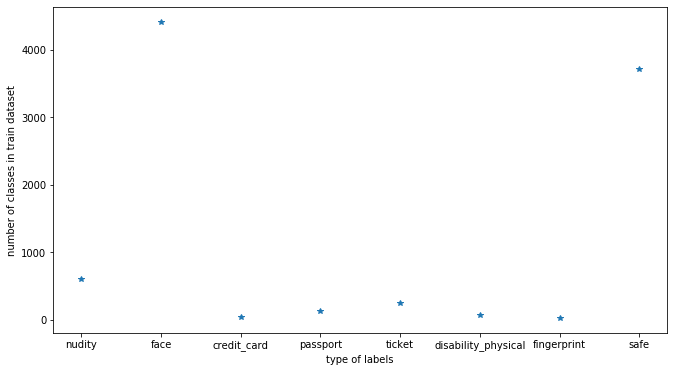

In [69]:
plt.figure(figsize=(11,6))
plt.plot(total_result, '*')
plt.ylabel('number of classes in train dataset')
plt.xlabel('type of labels')
plt.xticks(range(0, 8), labels_to_find)
plt.show()

In [32]:
corrupted_imgs

[(1537, '2017_24086860.jpg'),
 (3295, '2017_17704629.gif'),
 (3652, '2017_79148221.gif'),
 (6080, '2017_38643152.gif')]

In [34]:
tota_sizes

{(4000, 5210, 3),
 (3725, 5581, 3),
 (2726, 3636, 3),
 (500, 405, 3),
 (2523, 3363, 3),
 (1583, 2397, 3),
 (1764, 2454, 3),
 (2345, 3441, 3),
 (1547, 3419, 3),
 (627, 420, 3),
 (3543, 2362, 3),
 (2848, 2136, 3),
 (1106, 1375, 3),
 (2132, 3198, 3),
 (272, 450, 3),
 (767, 771, 3),
 (983, 1179, 3),
 (1500, 1252, 3),
 (2079, 3581, 3),
 (638, 800, 3),
 (1700, 2800, 3),
 (2000, 2550, 3),
 (1024, 680, 3),
 (3505, 5258, 3),
 (2600, 3888, 3),
 (1980, 2640, 3),
 (708, 296, 3),
 (800, 532, 3),
 (1872, 3328, 3),
 (846, 1280, 3),
 (760, 507, 3),
 (612, 612, 3),
 (1800, 2400, 3),
 (3200, 2008, 3),
 (1291, 2090, 3),
 (904, 2314, 3),
 (638, 1024, 3),
 (2048, 1155, 3),
 (1869, 1869, 3),
 (2080, 3299, 3),
 (1062, 1800, 3),
 (3016, 4016, 3),
 (600, 401, 3),
 (2230, 3401, 3),
 (2360, 2915, 3),
 (428, 640, 3),
 (1223, 1794, 3),
 (242, 425, 3),
 (1692, 3008, 3),
 (535, 1200, 3),
 (384, 288, 3),
 (3486, 2347, 3),
 (2112, 3168, 3),
 (2076, 3303, 3),
 (680, 514, 3),
 (3659, 2859, 3),
 (3231, 2055, 3),
 (768, 8

In [37]:
j = 0
zero_labels = list()
for key in list_annot:
    values = list_annot[key]
    values += np.array(values)+1
    if np.sum(values) == 8:
        zero_labels.append(key)

In [40]:
print('total number of images without classes: ', len(zero_labels))

total number of images without classes:  1413


In [ ]:
path_to_annot = "../data/csv/train_0_10000.csv"
path_to_imgs = '../data/train2017'
list_annot = get_annot_list(path_to_annot)
total_result = np.zeros(8)
tota_sizes = set()
corrupted_imgs = list()
for idx, key in tqdm(enumerate(list_annot)):
    img_pth = os.path.join(path_to_imgs, key)
    img = cv2.imread(img_pth)
    if  img is not None:
        tota_sizes.add(img.shape)
    else:
        corrupted_imgs.append((idx, key))
    total_result += list_annot[key]